# SimuPark: Un parque simulado

Desarrollado por: 
> Daniel David Delgado Cervantes - 2182066

59.03734782801262


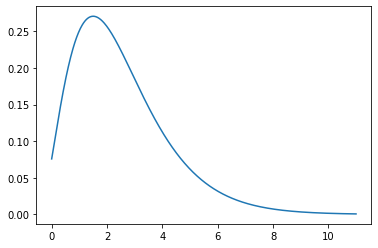

In [33]:
from matplotlib.pyplot import plot, hist
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd


x = np.linspace(0, 11, 11*60)
k = 3
fn = lambda x, k: (np.power(x + 30/60, k-1) * np.exp(-x - 30/60) / gamma(k))
print(sum(fn(x, k)))

plot(x, fn(x,k));

7852
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['Dropper', 'Tornado', 'BumpCars', 'SlowRiver', 'StarWarsRide', 'SpaceMountain']
['Tourist']


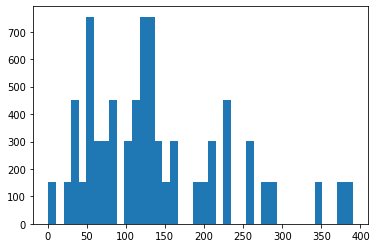

In [39]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

# np.random.seed(41)

park = Park(
    function=fn
)

park.startDayBase(100000)

print(len(park.guests))

y = [guest.arrivalTime for guest in park.guests]

hist(y, bins=40);

print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guestArchetypes])

In [40]:
guestData = []
columnName = [
    'arrivalTime',
    'departureTime',
    'timeInPark',
    'maxWait',
    'attractionsExperienced',
    'totalWaitTime',
    'averageWaitTime',
    # 'thingsDone',
    ]
for guest in park.guests:
    curGuest = []

    curGuest.append(guest.arrivalTime)
    curGuest.append(guest.departureTime)
    curGuest.append(guest.departureTime - guest.arrivalTime)
    curGuest.append(guest.maxWait)
    curGuest.append(guest.attractionsExperienced)
    curGuest.append(guest.totalWaitTime)
    if guest.attractionsExperienced == 0:
        curGuest.append(0)
    else: 
        curGuest.append(guest.totalWaitTime / guest.attractionsExperienced)
    # curGuest.append(guest.thingsDone)

    guestData.append(curGuest)

guestDF = pd.DataFrame(guestData, columns=columnName)
guestDF

,arrivalTime,departureTime,timeInPark,maxWait,attractionsExperienced,totalWaitTime,averageWaitTime
0,1,557,556,43,11,193,17.545455
1,1,409,408,88,6,205,34.166667
2,1,594,593,117,17,333,19.588235
3,1,443,442,56,12,282,23.500000
4,1,479,478,41,13,178,13.692308
...,...,...,...,...,...,...,...
7847,390,818,428,106,4,165,41.250000
7848,390,839,449,34,1,37,37.000000
7849,390,695,305,85,6,224,37.333333
7850,390,692,302,49,4,190,47.500000


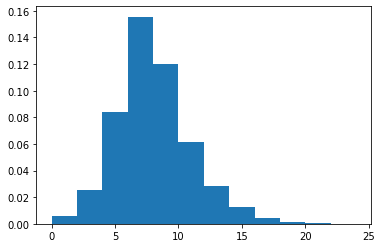

In [36]:
attrExp = [guest.attractionsExperienced for guest in park.guests]
attrExp
hist(attrExp, bins=12, density=True);

34.4957767876566


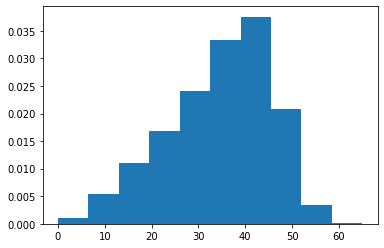

In [37]:
avgWaitTime = []

for guest in park.guests:
    if guest.attractionsExperienced == 0:
        continue

    avgWaitTime.append(guest.totalWaitTime / guest.attractionsExperienced)

print(np.mean(avgWaitTime))
hist(avgWaitTime, density=True);



In [38]:
attrWaitTime = [[attr.name, attr.queue.topWaitTime] for attr in park.attractions]
attrDF = pd.DataFrame(attrWaitTime, columns=["Name", "MaximunWaitTime"])
attrDF

,Name,MaximunWaitTime
0,Dropper,20
1,Tornado,20
2,BumpCars,0
3,SlowRiver,0
4,StarWarsRide,35
5,SpaceMountain,30
